# Model Assessment

We have discussed different types of models and different strategies for fitting them (i.e. cross-validation, regularization, etc.). However, how do we evaluate the performance of our models after they have been fit? We have already looked at metrics like the Mean Square Error (For Regression):

$$ MSE =  \frac{1}{N}\sum_{i=1}^{n}(y_i - \hat{y_i}))^2$$

and the log-loss/cross-entropy loss (for classification)


$$loss =  y \log \hat{y} + (1-y) \log (1 - \hat{y}) $$

However, these are usually not adequate to fully characterize the performance of a model. Specificically, we will take a look at how to assess the output of binary classification problems. Given the log loss does not really tell you how well your model is doing in a comprehensible format. To understand how well a model is actually performing, we will need to look at the Confusion Matrix:

## Confusion Matrix

A confusion matrix can be created by looking at the performance of the model on test examples. We denote the "positive" case arbitrarily as being 1 and the "negative" case to be 0.

The following figure it taken from the wikipedia article on the confusion matrix, which is a great resource: https://en.wikipedia.org/wiki/Confusion_matrix

![](./assets/confusion_matrix.png)

#### True Positive (TP)

A true positive occurs when the true value is positive and the predicted value is also positive.

#### False Positive (FP)

A false positive occurs when the true value is negative, but the predicted value is positive.

#### False Negative (FN)

A false negative occurs when the true value is positive, but the predicted value is negative.

#### True Negative (TN)

A true negative occurs when the true value is negative, and the predicted value is also negative.

## Metrics:
With those definitions out of the way, we can look at different methods for evaluating binary classification models:

### Accuracy:

Accuracy, using the terms defined above, is equivalent to: 

$$ \frac{TP + TN}{TP + TN + FP + FN} $$

In other words, it is simply the proportion of correctly classified examples. However, accuracy is generally *not* a good measure of model performance. For example, given an imbalanced class distribution such as 98% with positive class 1 and the remaining 2% with negative class 0, a model could have an accuracy of 98% if it simply predicted the positive class every time. Clearly this is not the model that are looking for, and so accuracy tends not to be a useful measure in and of itself.

Instead, we generally want to look at things like the Sensitivity and Specificity.

**Note**: Because of their use in different contexts, these terms often have many different names, which is... frustrating at times. However, the more you see them, the more you will begin to learn the correct terms. In the worst case, you can always look them up.

## Sensitivity

The True Positive Rate (TPR), also known as **Sensitivity** or **Recall**, is given by:

$$\frac{TP}{TP + FN}$$

In other words, it represents the proportion of positive examples (in total) that are classified as positive.

##  Specificity

The True Negative Rate (TNR), also known as **Specificity**, is the proportion of negative examples that are correctly classified as negative.

$$ \frac{TN}{TN + FP} $$


![](./assets/Sensitivity_and_specificity.svg)

## Thresholding

For classification models that output a probability, we need to define a *threshold*. An example of this is in the case of logistic regression.

Recall that the model for logistic regression is as follows:

$$ P(Y=1|X) = \frac{e^{\boldsymbol{w}^T \boldsymbol{x}}}{1 + e^{\boldsymbol{w}^T \boldsymbol{x}}} $$

However, note that for the confusion matrix above, we need to have a 1 or 0. P(Y=1|X) is not 1 or 0, it is a number in between (we are modeling a probability).

It is important to choose a threshold in this case. We can define a threshold, $t$, as being a value so that our predictions in logistic regression (or any other probabilistic classifier) are:

1 if $\hat{y}$ is greater than $t$ and 0 otherwise.

By default, 0.5 is the choice for logistic regression.

#### Different values of $t$ can lead to different confusion matrices!

For example, if a classifier has 4 test examples and predicts the following probabilities:

$$ \{0.35, 0.4, 0.6, 0.8\}$$

where the true classes are

$$ \{0, 1, 1, 1 \} $$


Using the default threshold of 0.5, our predicted classes become:

$$ \{0, 0, 1, 1\}$$

and the associated confusion matrix:

$$ \begin{bmatrix}2 & 0 \\ 1 & 1\end{bmatrix} $$

However, if we instead choose a threshold of 0.45, our predicted classes become:

$$ \{0, 0, 1, 1\} $$

leading to the perfect confusion matrix:

$$ \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} $$

However, how do we compare classifiers if there are many different confusion matrices that arise depending on our choice of threshold? In other words, is there a *threshold-agnostic* method for comparing classifiers?

## Receiver Operating Characteristic (ROC)

If different values of a threshold value $t$ can result in different confusion matrices, how can we compare different models against each other? Here, we introduce the Receiver Operating Characteristic (ROC)

The Receiver operating characteristic is a plot that has the sensitivity on the y-axis, and 1 - specificity on the x-axis. Let's take a look at an example:

In [5]:
import pandas as pd
model1_predictions = pd.read_csv("./assets/example_output.csv")

In [6]:
model1_predictions.head()

,outcome,prediction
0,1,0.988018
1,1,0.986377
2,1,0.981420
3,1,0.980582
4,1,0.975002


In [7]:
model2_predictions = pd.read_csv("./assets/example_output2.csv")

In [8]:
model2_predictions.head()

,outcome,prediction
0,0,0.983176
1,1,0.972331
2,1,0.932701
3,0,0.908685
4,1,0.907392


### The ROC curve shows the sensitivity and specificity for EACH possible threshold

In [9]:
from sklearn import metrics

In [11]:
spec1, sens1, thresholds = metrics.roc_curve(model1_predictions['outcome'].values, model1_predictions['prediction'].values)

In [13]:
import matplotlib.pyplot as plt

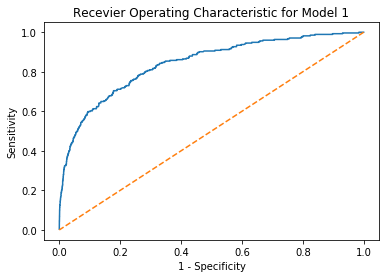

In [37]:
plt.plot(spec1, sens1)
plt.plot([1, 0],[1, 0], linestyle = "--")
plt.title('Recevier Operating Characteristic for Model 1')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

In the figure above, every possible threshold is represented. A way to think about this is as follows: 
 * Towards the lower left portion of the plot, we have low sensitivity, but high specificity. This means that we almost never correctly classify a positive example, but most negative examples are correctly specified. This corresponds to having a very high threshold. 
 * Towards the top right of the plot, we have a very high sensitivity, but low specificity. This means that virtually all positive examples are classified correctly, but many negative examples are not correctly classfied. This means we have a very low threshold. 

The goal of a classifier is to simultaneously aim for a high sensitivity as well as high specificity, which would bring us to the top left of the plot. We can also compare two classifiers by plotting them on the same plot.


In [38]:
spec2, sens2, thresholds = metrics.roc_curve(model2_predictions['outcome'].values, model2_predictions['prediction'].values)

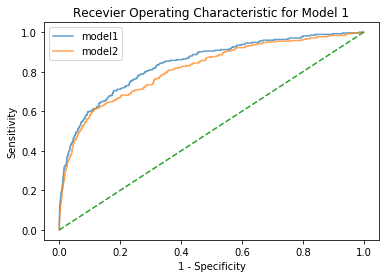

In [41]:
plt.plot(spec1, sens1, label = "model1", alpha = 0.7)
plt.plot(spec2, sens2, label = "model2", alpha = 0.7)
plt.plot([1, 0],[1, 0], linestyle = "--")
plt.legend()
plt.title('Recevier Operating Characteristic for Model 1')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

Here, we can see that model1 tends to outperform model2. 

However, if we fit hundreds of models, it does not make sense to view them all graphically. To summarize the characteristics of a given Receiver Operating Characteristic plot, we use the Area Under the Receiver Operating Characteristic (AUROC) or just Area Under the Curve (AUC). In addition, you may see this referred to as the $c$-statistic.

The AUC, as its name suggests, is simply the area under the ROC curve. The green dotted line above shows the worst possible classifier, and has an associated AUC of 0.5. If a classifier has a lower than 0.5 AUC (meaning the curve goes towards the bottom right of the plot), one can simply reverse the predicted result to obtain a classifier that has higher than 0.5 AUC. The maximum AUC is 1.0, meaning that the model perfectly classifies every example.

The `scikit-learn` package has an AUC function, which we demonstrate below:

In [45]:
metrics.roc_auc_score(model1_predictions['outcome'].values, model1_predictions['prediction'].values)

0.8411479315100603

In [46]:
metrics.roc_auc_score(model2_predictions['outcome'].values, model2_predictions['prediction'].values)

0.8139255667211965

### Interpretation of AUC

One potential interpretation of an AUC is that given 2 random samples from a test set, what is the probability that a model will correctly *rank* the two in terms of output (probability, score, etc.)? Note that because the ROC is drawn using every possible threshold, there is no reason why this applies only to probabilistic models, which is one advantage of the method. 

### Problems with AUC

Although the AUC is **by far** the most popular method for comparing and evaluating the performance of binary classification models, it is not without faults. In particular, AUCs struggle in cases where the two classes are highly imbalanced, which is true much of the time in medicine and other research areas. In other words, when the overall prevalence of the positive case is quite low, AUC may not fully reflect how well a model performs. 

Consider the following example:

Let us say that there are 1,000,000 patients, 1,000 of whom have a particular disease. Now, let's say we have two models.

The first model picks out 100 of the diseased patients out of 500 total tries (100 True Positivies, 400 False Positives).

The second model picks out 100 of the diseased patients out of 5000 total tries. (100 True Positives, 4900 False Positives).

The TPR (Sensitivity) for both classifiers up to this point is exactly the same (100 out of 1,000,000), but their False Positive Rates (1 - Specificity) are different.

The False Positive Rate for model 1 is 400 / 999,000 and the False Positive Rate for model 2 is 4900 / 999,000.

This is equivalent to 0.0004004 and 0.0049049, respectively. Although these are an order of magnitude apart, they don't really look too different on the ROC scale. Thus, it can be difficult to differentiate these two models, even though 1 clearly outperforms the other.

## Precision

In order to deal with the above problem, we generally look at the Precision. The **Precision**, or **Positive Predictive Value** of a classifier, can be written as:

$$ \frac{TP}{TP + FP} $$

This represents, of the examples which the classifier has predicted to be positive, what percentage are actually positive?

In the example above, model1 would have a precision of 100 / 500, or 0.2 and model 2 would have a precision of 100 / 5000, or 0.02. This is often more characteristic of how well a model is performing.

Like sensitivity and specifciity, this is also only available after a threshold has already been chosen. The analogue to the Receiver Operating Characterstic is known as the Precision-Recall Curve.

The precision-recall curve positions the precision on the y-axis while the recall is on the x-axis. Let's see an example of this curve.

In [47]:
prec1, rec1, thresholds1 = metrics.precision_recall_curve(model1_predictions['outcome'].values, model1_predictions['prediction'].values)

In [48]:
prec2, rec2, thresholds2, = metrics.precision_recall_curve(model2_predictions['outcome'].values, model2_predictions['prediction'].values)

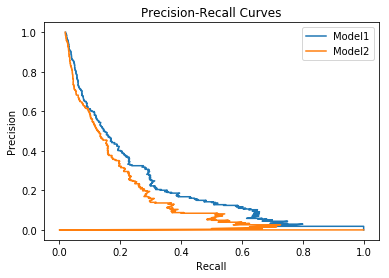

In [54]:
plt.plot(prec1, rec1, label = "Model1")
plt.plot(prec2, rec2, label = "Model2")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.show()

Here, we can see that as the precision of a classifier drops (meaning the threshold is set lower and lower), we allow more false positives (lower precision), but we also capture more of the positives in the total set (culminating in perfect recall).

The goal is now to reach the top right corner, where we have simultaneously high precision and recall. However, as with most models, this goal is unattainable. The benefits of the Precision-Recall curve, however, is that it works even when there is a large class imbalance, and many have argued that it should replace AUC in these settings. 

One derived metric from the precision-recall curve is the Area under the Precision Recall Curve (AUPR). This is more commonly known as the Average Precision. There are many implementations of this available, which we demonstrate.

In [58]:
metrics.average_precision_score(model1_predictions['outcome'].values, model1_predictions['prediction'].values)

0.22938673077910499

In [59]:
metrics.average_precision_score(model2_predictions['outcome'].values, model2_predictions['prediction'].values)

0.1744171591240456

A model whose recall increased linearly as the precision decreased linearly would have a Average Precision of 0.5. It seems that this model is correctly classifying easy-to-classify examples, but then as the threshold is dropped the precision drops fairly quickly. 

## Other Metrics and Considerations

#### F-Measure

The $F1$ Score is another metric that is often considered in these settings. The $F1$ scores is given by:

$$ 2 * \frac{precision * recall}{precision + recall} $$

In other words, it is the harmonic mean of the precision and recall.

This measure places equal importance on both the precision and the recall. The generalized form of the F-measure is given by:

$$F_\beta = (1 + \beta^2) * \frac{precision * recall}{(\beta^2*precision) + recall} $$

This can also be written in terms of true positive and false positives + negatives:

$$ F_\beta = \frac{(1+\beta^2) * TP}{(1+\beta^2) * TP + \beta^2 * FN + FP} $$

For example the $F_2$ measure places twice the importance on recall than precision and the $F_0.5$ measure weighs recall less than precision.

#### Precision-at-K

Another measure that is useful for measuring the performance of binary classification models is the *precision-at-K* measure. Rather than considering the precision over the entire dataset, it can be useful to look at the precision at specific values. This is most important when there is an associated workflow that can help inform the choice of $k$. For example, let us say that there are 100,000 patients which need to be screened for a particular disease. Rather than trying to assess the precision of the model at all possible thresholds, it may make sense to limit the dataset to the top 2,000 patients since it is unlikely that more than 2,000 patients will actually be reviewed. In this setting, precision-at-2000 may be the most useful metric since it mimics the actual workflow of screening the patients.